In [1]:
%matplotlib inline
!pip install tsfresh
!pip install tensorflow
!pip install numpy==1.21
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
from typing import Tuple

import tsfresh
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import tensorflow as tf

import os

import matplotlib.pyplot as plt

# keras goodies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, MaxPooling2D,Conv2D,Conv1D, Dropout, MaxPooling1D, BatchNormalization
from tensorflow.keras import optimizers
import tensorflow_decision_forests as tfdf
from tensorflow.keras import regularizers
from tensorflow.keras import metrics as kmetrics
import tensorflow.keras.backend as K
print("Basic imports: Done!")


    
print("Done")


ERROR:numba.cuda.cudadrv.driver:Call to cuInit results in CUDA_ERROR_NO_DEVICE


Basic imports: Done!
Done


In [4]:
pdiot_data_dir = "./clean_train/"

import os 
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/PDIoT")
cwd= os.getcwd()
print (cwd)
ls= os.listdir()
print (ls)
#os.chdir("/")



student_ids = dict()

activity_list = ["Sitting",
                 "Sitting bent forward",
                 "Sitting bent backward",
                 "Standing",
                 "Lying down left",
                 "Lying down right",
                 "Lying down on stomach",
                 "Lying down on back",
                 "Walking at normal speed",
                 "Running",
                 "Climbing stairs",
                 "Descending stairs",
                 "Desk work",
                 "Movement"]

thingy_cols_list = ['timestamp', 'accel_x', 'accel_y', 'accel_z', 
                    'gyro_x', 'gyro_y', 'gyro_z', 
                    'mag_x', 'mag_y', 'mag_z', 
                    'sensor_type', 'activity_type', 'activity_code', 
                    'subject_id', 'notes', 'recording_id']

respeck_cols_list = ['timestamp', 'accel_x', 'accel_y', 'accel_z', 
                     'gyro_x', 'gyro_y', 'gyro_z', 
                     'sensor_type', 'activity_type', 'activity_code', 
                     'subject_id', 'notes', 'recording_id']

expected_freq = 25

expected_length_seconds = 30

all_student_ids = [s for s in os.listdir(pdiot_data_dir) if s[0]=='s' ]
#all_student_ids



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/PDIoT
['cnn_rnn_gru.ipynb', 'FINAL CNN.ipynb', 'clean_train', 'FMR100.tflite', 'FMT100.tflite', 'Model for Thingy.tflite', 'Model for Both.ipynb', 'Final-model-test', 'app.zip', '2022', '4 Classes Model for Respeck.ipynb', 'Model for Thingy.ipynb', 'Final_Model_for_Thingy.ipynb', 'FINAL_CNN_DianTu_RRRR.ipynb', 'application.apk', 'FM1000.tflite', 'Report.gdoc', 'Model for Respeck.ipynb', 'Copy of Model for Thingy.ipynb', 'Group_H_PDIoT_CW3_Report.gdoc', 'Copy of Model for Respeck.ipynb']


In [5]:
from os import listdir
from os.path import isfile, join
import random
# import all data
# base_df = pd.DataFrame()
base_df = pd.read_csv("./2022/Respeck_recordings_clean.csv")



# for i in random.choices(all_student_ids, k=20):
#     clean_data_folder = pdiot_data_dir+i
#     for filename in os.listdir(clean_data_folder):
#         full_path = f"{clean_data_folder}/{filename}"
#         #print(full_path)
#         # load data into a DataFrame
#         new_df = pd.read_csv(full_path)
        
    
#         # merge into the base DataFrame
#         base_df = pd.concat([base_df, new_df])
print("Done")

Done


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
base_df

,Unnamed: 0,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,recording_id
0,0,1.633516e+12,0.261475,-1.116516,-0.502991,-0.812500,12.312500,19.500000,Respeck,Climbing stairs,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
1,1,1.633516e+12,-0.177734,-0.636292,-0.477600,-5.265625,2.953125,-9.281250,Respeck,Climbing stairs,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
2,2,1.633516e+12,0.351562,-0.879456,-0.335754,5.671875,24.656250,-10.562500,Respeck,Climbing stairs,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
3,3,1.633516e+12,0.298584,-1.253479,-0.299622,-3.609375,2.687500,5.890625,Respeck,Climbing stairs,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
4,4,1.633516e+12,0.056152,-0.777405,-0.210754,-14.328125,5.421875,8.140625,Respeck,Climbing stairs,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481932,492670,1.632930e+12,-0.376465,-0.746399,0.693543,-0.171875,-0.953125,1.281250,Respeck,Sitting bent backward,5.0,s2211228,NaN,Respeck_s2211228_Sitting bent backward_29-09-2...
481933,492671,1.632930e+12,-0.345703,-0.749329,0.677429,-0.671875,-0.187500,-1.015625,Respeck,Sitting bent backward,5.0,s2211228,NaN,Respeck_s2211228_Sitting bent backward_29-09-2...
481934,492672,1.632930e+12,-0.368408,-0.745422,0.690857,-0.218750,-0.640625,0.375000,Respeck,Sitting bent backward,5.0,s2211228,NaN,Respeck_s2211228_Sitting bent backward_29-09-2...
481935,492673,1.632930e+12,-0.363281,-0.747375,0.689148,0.078125,0.796875,-0.046875,Respeck,Sitting bent backward,5.0,s2211228,NaN,Respeck_s2211228_Sitting bent backward_29-09-2...


In [7]:
#Clean data
#base_df=base_df.dropna(thresh=5).drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
#Clean data
base_df=base_df.dropna(subset=['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z'])
base_df=base_df[base_df["activity_type"]!="Falling on the back"]
base_df=base_df[base_df["activity_type"]!="Falling on the left"]
base_df=base_df[base_df["activity_type"]!="Falling on the right"]
base_df=base_df[base_df["activity_type"]!="Falling on knees"]
base_df=base_df[base_df["sensor_type"]=="Respeck"]


In [8]:
base_df

,Unnamed: 0,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,recording_id
0,0,1.633516e+12,0.261475,-1.116516,-0.502991,-0.812500,12.312500,19.500000,Respeck,Climbing stairs,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
1,1,1.633516e+12,-0.177734,-0.636292,-0.477600,-5.265625,2.953125,-9.281250,Respeck,Climbing stairs,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
2,2,1.633516e+12,0.351562,-0.879456,-0.335754,5.671875,24.656250,-10.562500,Respeck,Climbing stairs,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
3,3,1.633516e+12,0.298584,-1.253479,-0.299622,-3.609375,2.687500,5.890625,Respeck,Climbing stairs,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
4,4,1.633516e+12,0.056152,-0.777405,-0.210754,-14.328125,5.421875,8.140625,Respeck,Climbing stairs,12.0,s1870467,rob,Respeck_s1870467_Climbing stairs_06-10-2021_11...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481932,492670,1.632930e+12,-0.376465,-0.746399,0.693543,-0.171875,-0.953125,1.281250,Respeck,Sitting bent backward,5.0,s2211228,NaN,Respeck_s2211228_Sitting bent backward_29-09-2...
481933,492671,1.632930e+12,-0.345703,-0.749329,0.677429,-0.671875,-0.187500,-1.015625,Respeck,Sitting bent backward,5.0,s2211228,NaN,Respeck_s2211228_Sitting bent backward_29-09-2...
481934,492672,1.632930e+12,-0.368408,-0.745422,0.690857,-0.218750,-0.640625,0.375000,Respeck,Sitting bent backward,5.0,s2211228,NaN,Respeck_s2211228_Sitting bent backward_29-09-2...
481935,492673,1.632930e+12,-0.363281,-0.747375,0.689148,0.078125,0.796875,-0.046875,Respeck,Sitting bent backward,5.0,s2211228,NaN,Respeck_s2211228_Sitting bent backward_29-09-2...


In [25]:
#A = base_df[(base_df["activity_type"]=="Walking at normal speed")|(base_df["activity_type"]=="Movement")]

#B = base_df[(base_df["activity_type"]=="Sitting")|(base_df["activity_type"]=="Standing")]


In [9]:
# split into windows

window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap

window_number = 0 # start a counter at 0 to keep track of the window number

all_overlapping_windows = []

for rid, group in base_df.groupby("recording_id"):
    #print(f"Processing rid = {rid}")
    
    large_enough_windows = [window for window in group.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]
    
    overlapping_windows = large_enough_windows[::step_size] 
    if len(overlapping_windows) == 0:
        continue
    
    # then we will append a window ID to each window
    for window in overlapping_windows:
        window.loc[:, 'window_id'] = window_number
        window_number += 1
    
    #print(len(overlapping_windows))
    all_overlapping_windows.append(pd.concat(overlapping_windows).reset_index(drop=True))
    
print("Done!")
    

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Done!


In [10]:
final_sliding_windows = pd.concat(all_overlapping_windows).reset_index(drop=True)

In [11]:
# now extract all features
# Respeck

columns_of_interest = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

feature_list = []

for col in columns_of_interest:
    new_features = tsfresh.extract_features(timeseries_container=final_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    
    feature_list.append(new_features)
    
feature_list = pd.concat(feature_list, axis=1)

#feature_list

Feature Extraction: 100%|██████████| 18380/18380 [00:08<00:00, 2270.17it/s]


In [12]:
feature_list

,accel_x__sum_values,accel_x__median,accel_x__mean,accel_x__length,accel_x__standard_deviation,accel_x__variance,accel_x__root_mean_square,accel_x__maximum,accel_x__absolute_maximum,accel_x__minimum,...,gyro_z__sum_values,gyro_z__median,gyro_z__mean,gyro_z__length,gyro_z__standard_deviation,gyro_z__variance,gyro_z__root_mean_square,gyro_z__maximum,gyro_z__absolute_maximum,gyro_z__minimum
0,-51.255371,-0.968384,-1.025107,50.0,0.213233,0.045468,1.047050,-0.700439,1.561768,-1.561768,...,3.140625,0.750000,0.062812,50.0,13.871830,192.427681,13.871973,24.687500,49.156250,-49.156250
1,-50.678223,-0.959229,-1.013564,50.0,0.260531,0.067876,1.046513,-0.522949,1.834717,-1.834717,...,-219.171875,-2.804688,-4.383438,50.0,14.144752,200.074006,14.808394,25.859375,49.156250,-49.156250
2,-49.170898,-0.957886,-0.983418,50.0,0.291696,0.085086,1.025767,-0.522949,1.834717,-1.834717,...,-115.062500,-1.226562,-2.301250,50.0,13.702989,187.771914,13.894879,27.281250,36.828125,-36.828125
3,-48.915527,-0.929932,-0.978311,50.0,0.274195,0.075183,1.016009,-0.530762,1.617920,-1.617920,...,70.125000,3.242188,1.402500,50.0,13.570778,184.166021,13.643058,35.625000,35.625000,-23.812500
4,-49.272705,-0.943726,-0.985454,50.0,0.263835,0.069609,1.020161,-0.483887,1.510010,-1.510010,...,67.218750,3.789062,1.344375,50.0,12.983287,168.565742,13.052704,35.625000,35.625000,-20.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18375,-27.093994,-0.541626,-0.541880,50.0,0.013698,0.000188,0.542053,-0.513184,0.563721,-0.563721,...,1.894531,0.035156,0.037891,50.0,0.095208,0.009064,0.102470,0.214844,0.214844,-0.125000
18376,-26.068359,-0.518433,-0.521367,50.0,0.024456,0.000598,0.521940,-0.486572,0.562256,-0.562256,...,5.656250,0.113281,0.113125,50.0,0.044235,0.001957,0.121466,0.214844,0.214844,0.035156
18377,-25.291992,-0.502319,-0.505840,50.0,0.013735,0.000189,0.506026,-0.486328,0.539307,-0.539307,...,1.492188,0.041016,0.029844,50.0,0.083010,0.006891,0.088212,0.195312,0.195312,-0.101562
18378,-26.353516,-0.533936,-0.527070,50.0,0.018792,0.000353,0.527405,-0.486328,0.552246,-0.552246,...,0.277344,-0.021484,0.005547,50.0,0.077016,0.005931,0.077215,0.179688,0.179688,-0.113281


In [ ]:
#final_sliding_windows[final_sliding_windows["activity_type"]=="Movement"] = 0
#final_sliding_windows[final_sliding_windows["activity_type"]=="Walking at normal speed"] = 1

In [13]:
final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min)
final_sliding_windows

,Unnamed: 0,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,recording_id,window_id
0,304045,1.633516e+12,-0.763184,-0.014465,0.079773,22.062500,9.484375,15.671875,Respeck,Climbing stairs,12.0,s1541031,NaN,Respeck_s1541031_Climbing stairs_06-10-2021_11...,0
1,304046,1.633516e+12,-0.794678,0.042175,0.153503,7.578125,-11.687500,6.468750,Respeck,Climbing stairs,12.0,s1541031,NaN,Respeck_s1541031_Climbing stairs_06-10-2021_11...,0
2,304047,1.633516e+12,-0.748291,-0.076233,0.016296,15.781250,-9.375000,4.890625,Respeck,Climbing stairs,12.0,s1541031,NaN,Respeck_s1541031_Climbing stairs_06-10-2021_11...,0
3,304048,1.633516e+12,-0.949707,-0.011536,0.012390,6.046875,-7.031250,1.531250,Respeck,Climbing stairs,12.0,s1541031,NaN,Respeck_s1541031_Climbing stairs_06-10-2021_11...,0
4,304049,1.633516e+12,-1.209961,0.216492,0.016296,-19.218750,-6.078125,1.421875,Respeck,Climbing stairs,12.0,s1541031,NaN,Respeck_s1541031_Climbing stairs_06-10-2021_11...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918995,39689,1.633509e+12,-0.500488,-0.236389,0.887146,0.148438,0.046875,0.089844,Respeck,Lying down on back,2.0,s2254050,NaN,xlstry-Respeck_s2254050_Lying down on back_06-...,18379
918996,39690,1.633509e+12,-0.490967,-0.247620,0.902039,0.093750,-0.058594,0.128906,Respeck,Lying down on back,2.0,s2254050,NaN,xlstry-Respeck_s2254050_Lying down on back_06-...,18379
918997,39691,1.633509e+12,-0.496582,-0.229309,0.893250,0.199219,-0.171875,0.058594,Respeck,Lying down on back,2.0,s2254050,NaN,xlstry-Respeck_s2254050_Lying down on back_06-...,18379
918998,39692,1.633509e+12,-0.494629,-0.241760,0.893738,-0.097656,-0.175781,0.035156,Respeck,Lying down on back,2.0,s2254050,NaN,xlstry-Respeck_s2254050_Lying down on back_06-...,18379


In [14]:
class_labels = {
    "Sitting":1,
    "Sitting bent forward":2,
    "Sitting bent backward":3,
    "Standing":4,
    "Lying down left":5,
    "Lying down right":6,
    "Lying down on stomach":7,
    "Lying down on back":8,
    "Walking at normal speed":9,
    "Running":10,
    "Climbing stairs":11,
    "Descending stairs":12,
    "Desk work":13,
    "Movement":14
}

window_id_class_labels = final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min).replace(class_labels)
#window_id_class_labels

In [16]:
columns_of_interest

['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [17]:
X = []
y = []

for window_id, group in final_sliding_windows.groupby('window_id'):
    print(f"window_id = {window_id}")
    
    shape = group[columns_of_interest].values.shape
    print(f"shape = {shape}")
    
    X.append(group[columns_of_interest].values)
    y.append(class_labels[group["activity_type"].values[0]])

Streaming output truncated to the last 5000 lines.
window_id = 15880
shape = (50, 6)
window_id = 15881
shape = (50, 6)
window_id = 15882
shape = (50, 6)
window_id = 15883
shape = (50, 6)
window_id = 15884
shape = (50, 6)
window_id = 15885
shape = (50, 6)
window_id = 15886
shape = (50, 6)
window_id = 15887
shape = (50, 6)
window_id = 15888
shape = (50, 6)
window_id = 15889
shape = (50, 6)
window_id = 15890
shape = (50, 6)
window_id = 15891
shape = (50, 6)
window_id = 15892
shape = (50, 6)
window_id = 15893
shape = (50, 6)
window_id = 15894
shape = (50, 6)
window_id = 15895
shape = (50, 6)
window_id = 15896
shape = (50, 6)
window_id = 15897
shape = (50, 6)
window_id = 15898
shape = (50, 6)
window_id = 15899
shape = (50, 6)
window_id = 15900
shape = (50, 6)
window_id = 15901
shape = (50, 6)
window_id = 15902
shape = (50, 6)
window_id = 15903
shape = (50, 6)
window_id = 15904
shape = (50, 6)
window_id = 15905
shape = (50, 6)
window_id = 15906
shape = (50, 6)
window_id = 15907
shape = (50, 

In [18]:
X = np.asarray(X)
y = np.asarray(y)

print(f"X shape = {X.shape}")
print(f"y shape = {y.shape}")

X shape = (18380, 50, 6)
y shape = (18380,)


In [27]:
print(f"X_train shape = {X_trainA.shape}")
print(f"y_train shape = {y_trainA.shape}")

print(f"X_test shape = {X_testA.shape}")
print(f"y_test shape = {y_testA.shape}")

X_train shape = (14704, 50, 6)
y_train shape = (14704, 14)
X_test shape = (3676, 50, 6)
y_test shape = (3676, 14)


In [28]:
X_trainA, X_testA, y_trainA, y_testA = train_test_split(X, y,
                                                    test_size=0.2, train_size=0.8)
y_trainA = np.asarray(pd.get_dummies(y_trainA), dtype=np.float32)
y_testA = np.asarray(pd.get_dummies(y_testA), dtype=np.float32)

filters = 128
kernel_size = 3
n_features = 6
activation='relu'
n_classes = 14

model = Sequential()

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', 
                 input_shape=(window_size, n_features)))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'), )
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics = ['accuracy'])

model.summary()

model.fit(X_trainA, y_trainA,
        batch_size=128, epochs=100, validation_data=(X_testA, y_testA))#100

y_pred_ohe = model.predict(X_testA)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_testA, axis=1)

print(classification_report(y_true_labels, y_pred_labels))

import tensorflow as TFC

converter = TFC.lite.TFLiteConverter.from_keras_model(model)
#converter._experimental_lower_tensor_list_ops = True
#converter.optimizations = []
tflite_model = converter.convert()

with open('Final_Model_R.tflite', 'wb') as f:
    f.write(tflite_model)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 48, 128)           2432      
                                                                 
 batch_normalization_18 (Bat  (None, 48, 128)          512       
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 48, 128)           0         
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 24, 128)          0         
 g1D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 24, 128)           0         
                                                                 
 conv1d_19 (Conv1D)          (None, 22, 128)          

[7]
[12]
[4]
[12]
[3]
[4]
[10]
[12]
[1]
[13]
[5]
[11]
[10]
[12]
[13]
[9]
[5]
[3]
[11]
[2]
[12]
[5]
[6]
[0]
[5]
[5]
[2]
[10]
[9]
[1]
[4]
[13]
[1]
[6]
[0]
[5]
[6]
[7]
[4]
[12]
[9]
[4]
[6]
[5]
[11]
[0]
[13]
[13]
[5]
[9]
[6]
[0]
[6]
[8]
[2]
[1]
[12]
[9]
[12]
[4]
[6]
[4]
[7]
[4]
[7]
[1]
[4]
[10]
[5]
[13]
[0]
[9]
[4]
[0]
[4]
[9]
[0]
[0]
[6]
[12]
[9]
[11]
[0]
[2]
[2]
[3]
[12]
[11]
[11]
[9]
[2]
[5]
[8]
[0]
[13]
[0]
[11]
[12]
[4]
[2]
[12]
[10]
[9]
[1]
[3]
[9]
[4]
[8]
[11]
[1]
[3]
[12]
[5]
[7]
[5]
[1]
[4]
[6]
[3]
[3]
[3]
[2]
[13]
[13]
[8]
[8]
[7]
[11]
[2]
[1]
[9]
[0]
[5]
[11]
[1]
[5]
[11]
[12]
[9]
[7]
[1]
[12]
[5]
[8]
[0]
[4]
[2]
[8]
[2]
[3]
[13]
[11]
[6]
[0]
[1]
[0]
[1]
[7]
[4]
[12]
[5]
[5]
[6]
[7]
[7]
[6]
[12]
[6]
[7]
[7]
[8]
[8]
[1]
[0]
[3]
[0]
[11]
[13]
[10]
[5]
[6]
[4]
[0]
[6]
[0]
[0]
[7]
[10]
[7]
[10]
[13]
[6]
[3]
[8]
[13]
[12]
[12]
[0]
[5]
[10]
[5]
[2]
[6]
[4]
[8]
[2]
[7]
[13]
[11]
[13]
[0]
[0]
[9]
[7]
[5]
[7]
[5]
[5]
[0]
[9]
[4]
[10]
[11]
[8]
[3]
[7]
[13]
[5]
[9]
[0]
[7]
[4]
[8]
[2]
[0]


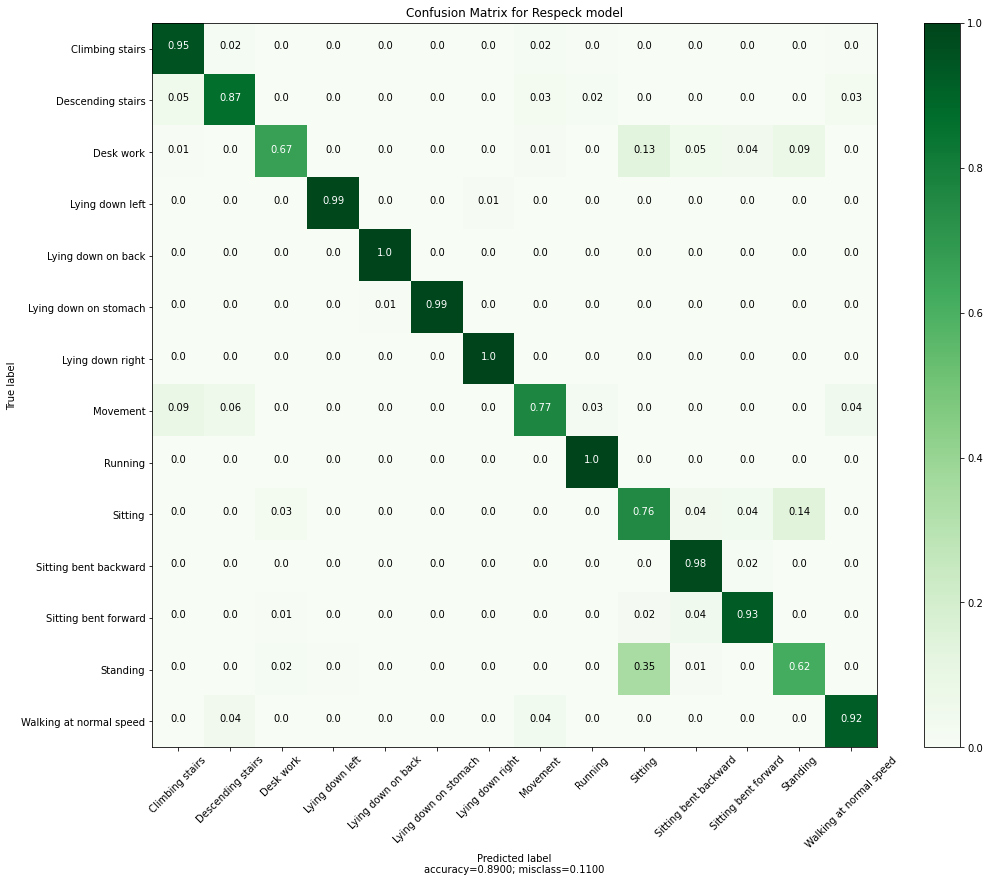

In [50]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import os
import itertools
import warnings
import argparse


R_class_labels = {
		0:"Sitting",
		1:"Sitting bent forward",
		2:"Sitting bent backward",
		3:"Standing",
		4:"Lying down left",
		5:"Lying down right",
		6:"Lying down on stomach",
		7:"Lying down on back",
		8:"Walking at normal speed",
		9:"Running",
		10:"Climbing stairs",
		11:"Descending stairs",
		12:"Desk work",
		13:"Movement"
		}
T_class_labels = {
		0:"Sitting",
		1:"Standing",
		2:"Desk work",
		}

##############################################
def plot_confusion_matrix(filename,cm,target_names,title='Confusion matrix',cmap=plt.cm.Greens,normalize=True):
	accuracy = round(np.trace(cm) / float(np.sum(cm)),2)
	misclass = 1 - accuracy

	if cmap is None:
		cmap = plt.get_cmap('Blues')

	plt.figure(figsize=(15, 12))
	plt.imshow(cm, interpolation='nearest', cmap=cmap)
	plt.title(title)
	plt.colorbar()

	if target_names is not None:
		tick_marks = np.arange(len(target_names))
		plt.xticks(tick_marks, target_names, rotation=45)
		plt.yticks(tick_marks, target_names)

	if normalize:
		cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


	thresh = cm.max() / 1.5 if normalize else cm.max() / 2
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		if normalize:
			plt.text(j, i, "{:0.4f}".format(round(cm[i, j],2)),
				horizontalalignment="center",
				color="white" if cm[i, j] > thresh else "black")
		else:
			plt.text(j, i, "{:,}".format(round(cm[i, j],2)),
				horizontalalignment="center",
				color="white" if cm[i, j] > thresh else "black")


	plt.tight_layout()
	plt.ylabel('True label')
	plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
	plt.savefig('./'+filename,dpi=300)
	print("Created ",filename," in the current directory")


#####################################################


# R_df = pd.read_csv(respeck_data_path)
# R_df=R_df[R_df["sensor_type"]=="Respeck"]
# R_df = R_df[(R_df["activity_type"]!="Sitting")&(R_df["activity_type"]!="Standing")&(R_df["activity_type"]!="Desk work")]
# R_X, R_y = into_windows(R_df, 50, 25) 
R_X = X_testA
R_y = []
indexes = np.argmax(y_testA, axis=1)


for i in indexes:
  print([i])
  R_y.append(R_class_labels[i])
  #print(i)



interpreter1 = tf.lite.Interpreter(model_path='Final_Model_R.tflite')

interpreter1.allocate_tensors()
input_details = interpreter1.get_input_details()
output_details = interpreter1.get_output_details()
R_y_pred = []
number_of_data = R_X.shape[0]
for i in range(0, number_of_data):
	input_data = np.array([R_X[i]]).astype(np.float32)
	interpreter1.set_tensor(input_details[0]['index'],input_data)#, np.expand_dims(input_data, axis=0))
	interpreter1.invoke()
	output_data = interpreter1.get_tensor(output_details[0]['index'])
	output_data = np.argmax(np.array(output_data[0]))
	R_y_pred.append(R_class_labels[output_data])
R_report = classification_report(R_y, R_y_pred)
print("*"*20,"classification_report for the Respeck model","*"*20)
print(R_report)
R_report = classification_report(R_y, R_y_pred,output_dict=True)
print("*"*20,"details: classification_report for the Respeck model","*"*20)
print(R_report)

conf_mat = confusion_matrix(R_y, R_y_pred, normalize='true')
print_labels = ["Climbing stairs","Descending stairs","Desk work","Lying down left","Lying down on back","Lying down on stomach","Lying down right","Movement","Running","Sitting","Sitting bent backward","Sitting bent forward","Standing","Walking at normal speed"]
plot_confusion_matrix("Confusion Matrix for Respeck model",conf_mat, normalize=False,target_names=print_labels,title='Confusion Matrix for Respeck model')

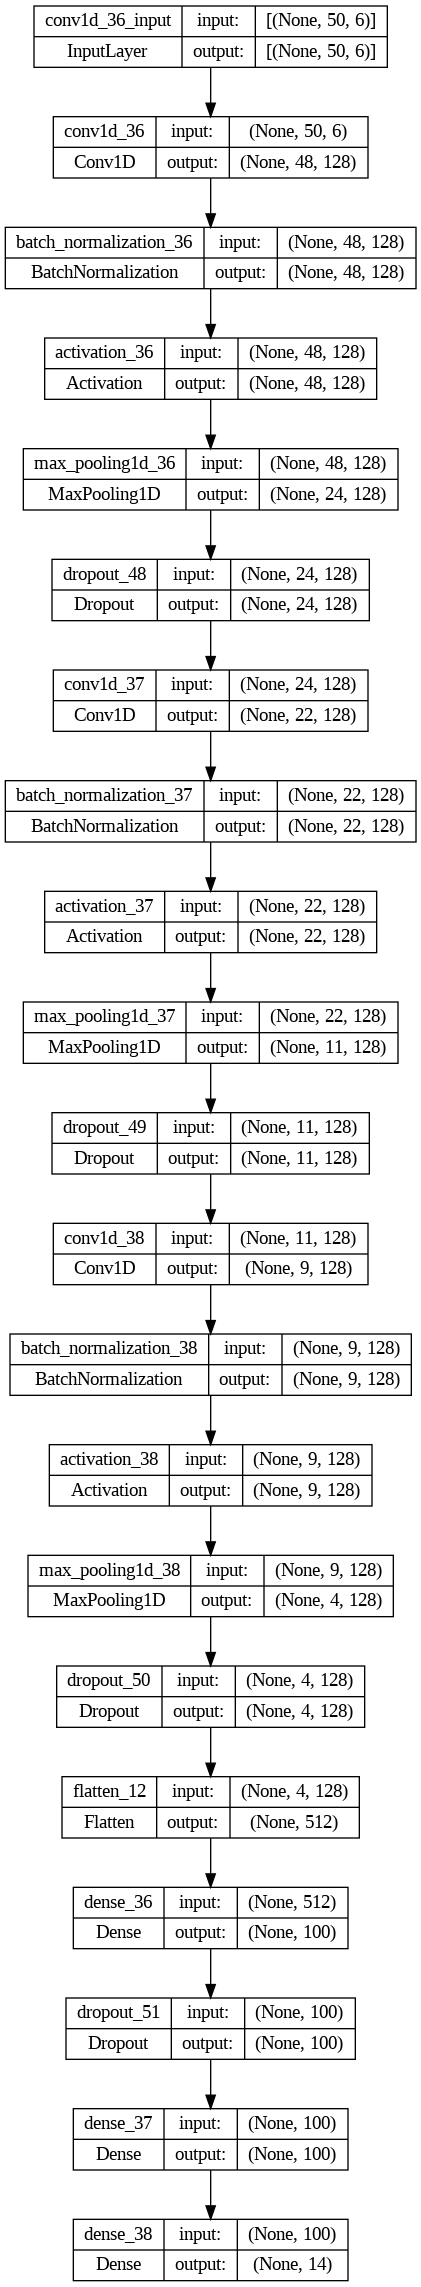

In [52]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='R_model_plot.png', show_shapes=True, show_layer_names=True)

In [53]:
from sklearn.model_selection import KFold

filters = 128
kernel_size = 3
n_features = 6
activation='relu'
n_classes = 14


for kfold, (train, test) in enumerate(KFold(n_splits=5, shuffle=True).split(X, y)):
  print("******")
  print("Fold: ",kfold)

  print('Train Set')
  print(X[train].shape)
  print(y[train].shape)

  print('Test Set')
  print(X[test].shape)
  print(y[test].shape)

  y_train = np.asarray(pd.get_dummies(y[train]), dtype=np.float32)
  y_test = np.asarray(pd.get_dummies(y[test]), dtype=np.float32)

  X_train = X[train]
  X_test = X[test]

  model = Sequential()

  model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', 
                 input_shape=(window_size, n_features)))
  model.add(BatchNormalization())
  model.add(Activation(activation))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Dropout(0.1))

  model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
  model.add(BatchNormalization())
  model.add(Activation(activation))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Dropout(0.1))

  model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'), )
  model.add(BatchNormalization())
  model.add(Activation(activation))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Dropout(0.1))

  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(n_classes, activation='softmax'))

  model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics = ['accuracy'])

  model.summary()

  model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test))#100
  
  y_pred_ohe = model.predict(X_test)
  y_pred_labels = np.argmax(y_pred_ohe, axis=1)
  y_true_labels = np.argmax(y_test, axis=1)

  print(classification_report(y_true_labels, y_pred_labels))

  
  print("******")

******
Fold:  0
Train Set
(14704, 50, 6)
(14704,)
Test Set
(3676, 50, 6)
(3676,)
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_39 (Conv1D)          (None, 48, 128)           2432      
                                                                 
 batch_normalization_39 (Bat  (None, 48, 128)          512       
 chNormalization)                                                
                                                                 
 activation_39 (Activation)  (None, 48, 128)           0         
                                                                 
 max_pooling1d_39 (MaxPoolin  (None, 24, 128)          0         
 g1D)                                                            
                                                                 
 dropout_52 (Dropout)        (None, 24, 128)           0         
                                      